Archivos encontrados:
../results\run_1_threads.csv
../results\run_2_threads.csv
../results\run_4_threads.csv
../results\run_6_threads.csv
../results\run_8_threads.csv


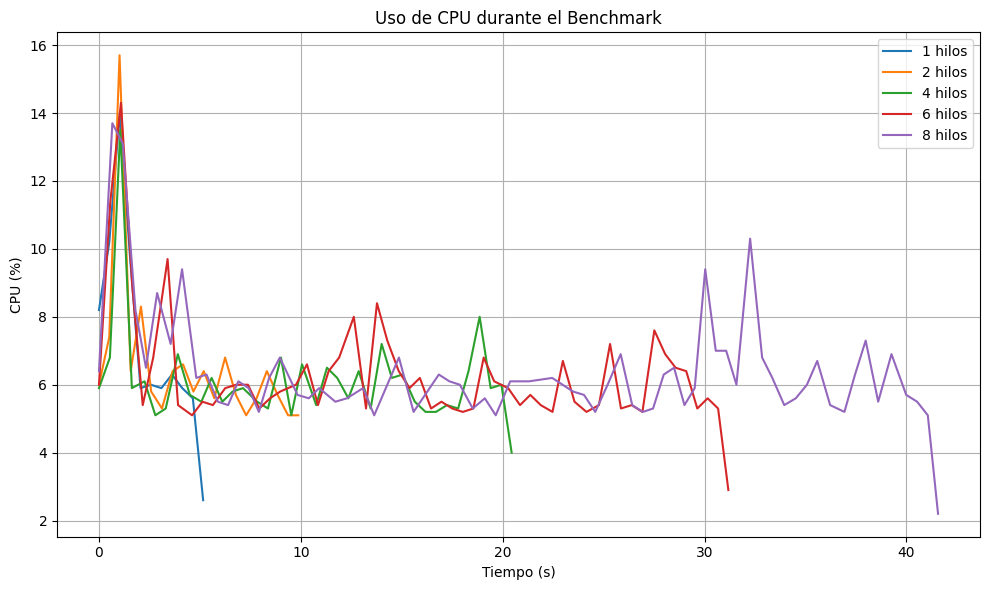

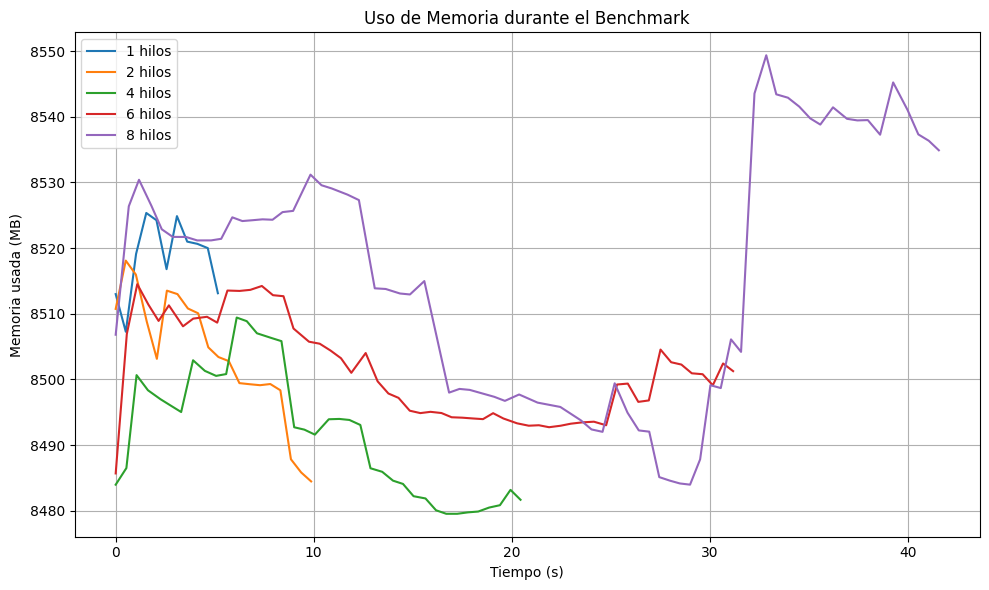

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Crear carpeta si no existe
output_dir = 'notebook'
os.makedirs(output_dir, exist_ok=True)

# Buscar CSVs
csv_files = glob.glob('../results/run_*_threads.csv')
csv_files.sort(key=lambda x: int(x.split('_')[-2]))

print("Archivos encontrados:")
for f in csv_files:
    print(f)

# Cargar datos
data = {}
for file in csv_files:
    threads = int(file.split('_')[-2])
    try:
        df = pd.read_csv(file)
        if df.empty:
            print(f"⚠️ CSV vacío: {file}")
        elif not {'timestamp', 'cpu_percent', 'memory_used_MB'}.issubset(df.columns):
            print(f"❌ Columnas inválidas en {file}: {df.columns}")
        else:
            df['time_offset'] = df['timestamp'] - df['timestamp'].iloc[0]
            data[threads] = df
    except Exception as e:
        print(f"❌ Error leyendo {file}: {e}")

# Graficar CPU
plt.figure(figsize=(10, 6))
for threads, df in data.items():
    plt.plot(df['time_offset'], df['cpu_percent'], label=f'{threads} hilos')
plt.title('Uso de CPU durante el Benchmark')
plt.xlabel('Tiempo (s)')
plt.ylabel('CPU (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
cpu_plot_path = os.path.join(output_dir, 'cpu_usage.png')
plt.savefig(cpu_plot_path)
plt.show()

# Graficar memoria
plt.figure(figsize=(10, 6))
for threads, df in data.items():
    plt.plot(df['time_offset'], df['memory_used_MB'], label=f'{threads} hilos')
plt.title('Uso de Memoria durante el Benchmark')
plt.xlabel('Tiempo (s)')
plt.ylabel('Memoria usada (MB)')
plt.legend()
plt.grid(True)
plt.tight_layout()
mem_plot_path = os.path.join(output_dir, 'memory_usage.png')
plt.savefig(mem_plot_path)
plt.show()

